In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import to_rgb, rgb_to_hsv, hsv_to_rgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

plt.xkcd(scale=0.5)

p = sns.color_palette("colorblind")

TRUE_COLOR = p[1]
SAMPLES_COLOR = p[0]#"steelblue"
POLY_3_COLOR = p[2]#"darkorange"
POLY_15_COLOR = p[3]#"darkgreen"
TRAIN_COLOR = p[4]#"crimson"
TEST_COLOR = p[5]#"darkolivegreen"

def true_fun(x):
    return np.cos(1.5 * np.pi * x)

rng = np.random.RandomState(0)

n_samples = 30

x = np.sort(rng.rand(n_samples))
X = x[:, np.newaxis]
y = true_fun(x) + rng.randn(n_samples) * 0.1

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0)

def poly_fit(X, y, degree):
    pipeline = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression(),
    )
    pipeline.fit(X, y)
    return pipeline

def start_plot():
    fig, ax = plt.subplots(constrained_layout=True)
    return fig, ax

def finalise_plot(ax):
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xlim((0, 1))
    ax.set_ylim((-2, 5))
    ax.legend(loc="best")
    
def plot_model(ax, model, color, label="Model"):
    X_test = np.linspace(0, 1, 500)[:, np.newaxis]
    y_pred = model.predict(X_test)
    ax.plot(X_test, y_pred, label=label, color=color, linestyle="--")

def plot_true(ax):
    X_test = np.linspace(0, 1, 100)[:, np.newaxis]
    ax.plot(X_test, true_fun(X_test), label="True function", color=TRUE_COLOR)
    
def plot_samples(ax, X, y, label, color):
    edgecolor = hsv_to_rgb(rgb_to_hsv(to_rgb(color)) * [1.0, 0.9, 1.0])
    ax.scatter(X, y, edgecolor=edgecolor, facecolor=color, s=50, label=label, zorder=100)

## True function to samples

In [2]:
import logging
# Hide the "findfont: Font family" warnings
logging.getLogger('matplotlib.font_manager').disabled = True

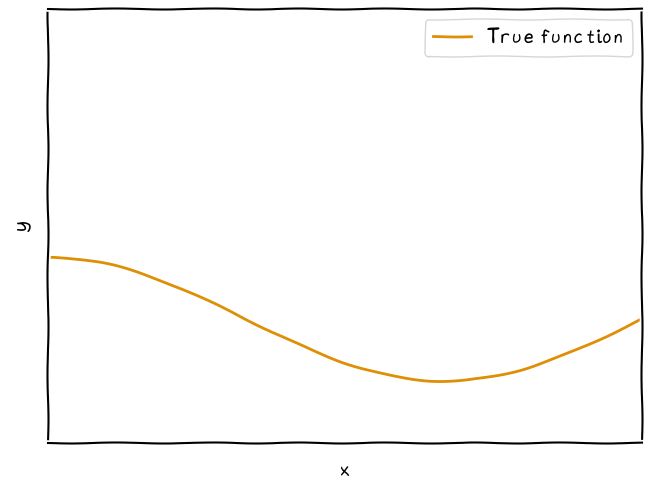

In [3]:
fig, ax = start_plot()
plot_true(ax)
finalise_plot(ax)
fig.savefig("overfit_just_model.svg")

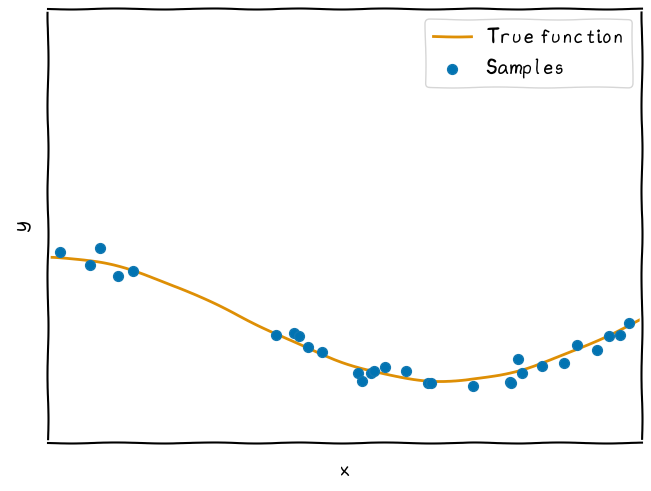

In [4]:
fig, ax = start_plot()
plot_true(ax)
plot_samples(ax, X, y, "Samples", SAMPLES_COLOR)
finalise_plot(ax)
fig.savefig("overfit_model.svg")

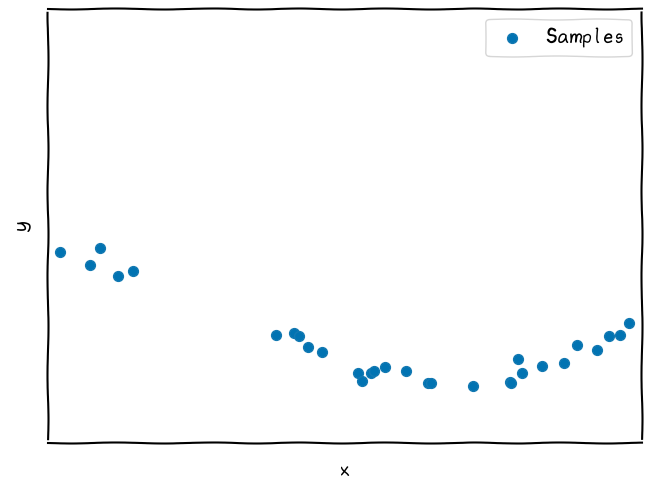

In [5]:
fig, ax = start_plot()
plot_samples(ax, X, y, "Samples", SAMPLES_COLOR)
finalise_plot(ax)
fig.savefig("overfit_samples.svg")

## Fitting with different degrees

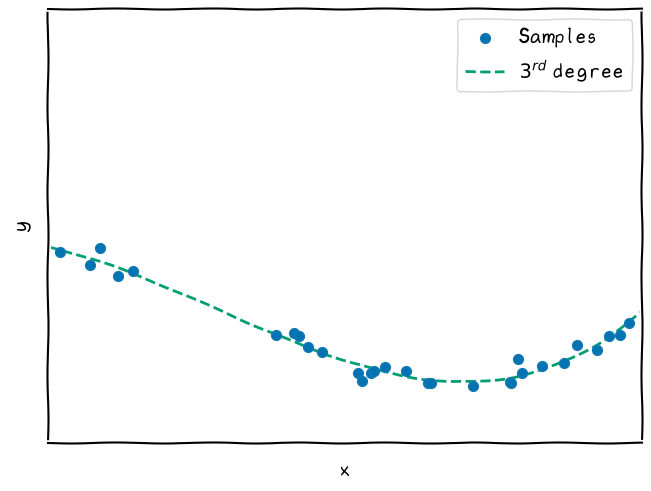

In [6]:
model = poly_fit(X, y, 3)

fig, ax = start_plot()
plot_samples(ax, X, y, "Samples", SAMPLES_COLOR)
plot_model(ax, model, POLY_3_COLOR, "$3^{rd}$ degree")
finalise_plot(ax)
fig.savefig("overfit_3.svg")

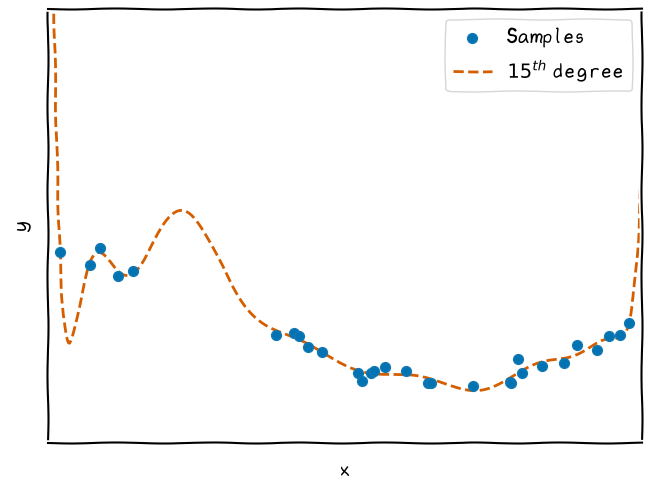

In [7]:
model = poly_fit(X, y, 14)

fig, ax = start_plot()
plot_samples(ax, X, y, "Samples", SAMPLES_COLOR)
plot_model(ax, model, POLY_15_COLOR, "$15^{th}$ degree")
finalise_plot(ax)
fig.savefig("overfit_15.svg")

In [8]:
model_3 = poly_fit(X, y, 3)
model_15 = poly_fit(X, y, 14)

fig, ax = start_plot()
plot_samples(ax, X, y, "Samples", SAMPLES_COLOR)
plot_model(ax, model_15, POLY_15_COLOR, "$15^{th}$ degree")
plot_model(ax, model_3, POLY_3_COLOR, "$3^{rd}$ degree")
finalise_plot(ax)
fig.savefig("overfit_3_15.svg")

## Train test split

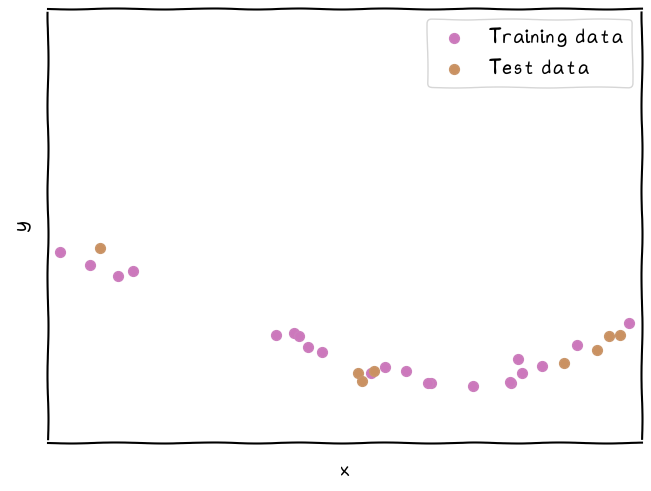

In [9]:
fig, ax = start_plot()
plot_samples(ax, train_X, train_y, "Training data", TRAIN_COLOR)
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
finalise_plot(ax)
fig.savefig("overfit_split.svg")

## 15th order overfits

In [10]:
model = poly_fit(train_X, train_y, 14)

fig, ax = start_plot()
plot_samples(ax, train_X, train_y, "Training data", TRAIN_COLOR)
plot_model(ax, model, POLY_15_COLOR, "$15^{th}$ degree")
finalise_plot(ax)
fig.savefig("overfit_15_train.svg")

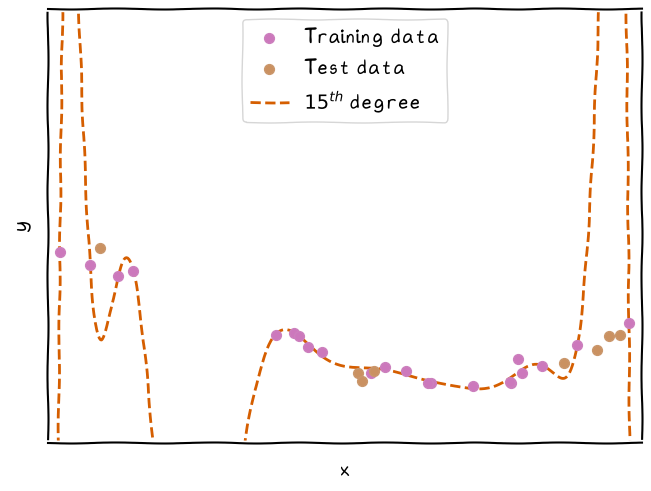

In [11]:
model = poly_fit(train_X, train_y, 14)

fig, ax = start_plot()
plot_samples(ax, train_X, train_y, "Training data", TRAIN_COLOR)
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
plot_model(ax, model, POLY_15_COLOR, "$15^{th}$ degree")
finalise_plot(ax)
fig.savefig("overfit_15_split.svg")

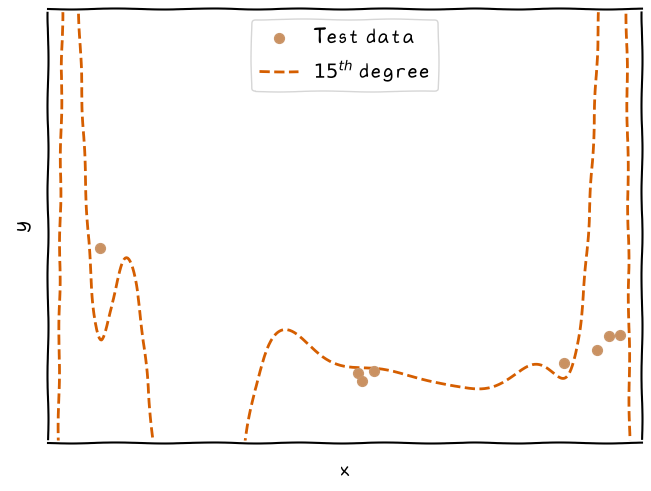

In [12]:
model = poly_fit(train_X, train_y, 14)

fig, ax = start_plot()
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
plot_model(ax, model, POLY_15_COLOR, "$15^{th}$ degree")
finalise_plot(ax)
fig.savefig("overfit_15_test.svg")

## 3rd order does not overfit

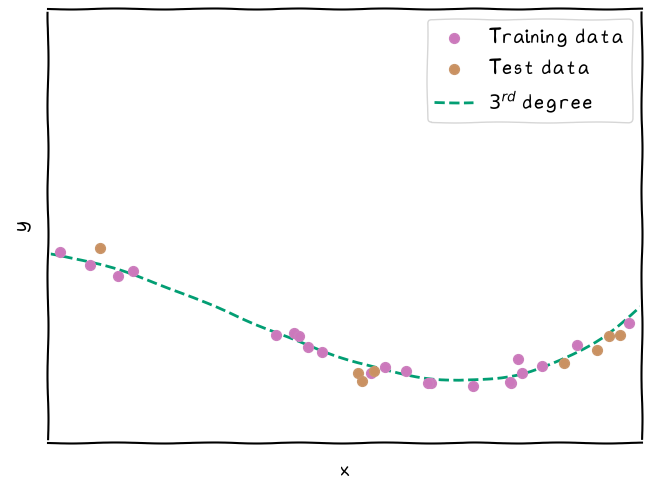

In [13]:
model = poly_fit(train_X, train_y, 3)

fig, ax = start_plot()
plot_samples(ax, train_X, train_y, "Training data", TRAIN_COLOR)
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
plot_model(ax, model, POLY_3_COLOR, "$3^{rd}$ degree")
finalise_plot(ax)
fig.savefig("overfit_3_split.svg")

In [14]:
model = poly_fit(train_X, train_y, 3)

fig, ax = start_plot()
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
plot_model(ax, model, POLY_3_COLOR, "$3^{rd}$ degree")
finalise_plot(ax)
fig.savefig("overfit_15_test.svg")

## Compare 3rd and 15th orders directly

In [15]:
model_3 = poly_fit(train_X, train_y, 3)
model_15 = poly_fit(train_X, train_y, 14)

fig, ax = start_plot()
plot_samples(ax, train_X, train_y, "Training data", TRAIN_COLOR)
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
plot_model(ax, model_15, POLY_15_COLOR, "$15^{th}$ degree")
plot_model(ax, model_3, POLY_3_COLOR, "$3^{rd}$ degree")
finalise_plot(ax)
fig.savefig("overfit_3_15_split.svg")

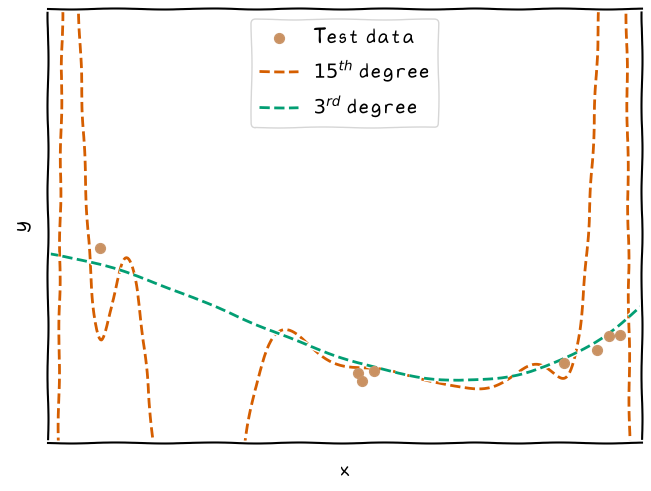

In [16]:
model_3 = poly_fit(train_X, train_y, 3)
model_15 = poly_fit(train_X, train_y, 14)

fig, ax = start_plot()
plot_samples(ax, test_X, test_y, "Test data", TEST_COLOR)
plot_model(ax, model_15, POLY_15_COLOR, "$15^{th}$ degree")
plot_model(ax, model_3, POLY_3_COLOR, "$3^{rd}$ degree")
finalise_plot(ax)
fig.savefig("overfit_3_15_split.svg")